Let's import libraries.

In [87]:
import random
import numpy as np
import matplotlib.pyplot as plt

Let's write sigmoid, the activation function for logistic regression.

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Test the sigmoid function below.

In [8]:
assert(sigmoid(float('inf')) == 1)
assert(sigmoid(0) == 0.5)
assert(sigmoid(float('-inf')) == 0)

Below, we will create the model for logistic regression.

In [83]:
''' Trains a logistic regression model and outputs: W, b, costs '''
def model(X, Y, learning_rate = 0.1, num_epochs = 1000):

    # get the dimensions of the weights
    (n_x, m) = X.shape
    # (_, m) = Y.shape
    
    # initialize weights
    W = np.zeros((n_x, 1))
    b = 0
    costs = []
    
    for i in range(num_epochs):
        # forward propagation
        Z = np.dot(W.T, X) + b
        A = sigmoid(Z)
        
        # compute cost
        cost = -1 / m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
        costs.append(cost)
        
        # backward propagation
        dZ = A - Y
        dW = 1 / m * np.dot(X, dZ.T)
        db = 1 / m * np.sum(dZ)
        W = W - learning_rate * dW
        b = b - learning_rate * db
        
    return W, b, costs

Create a random data set.

In [ ]:
X = np.random.rand(100, 100)
Y = np.sum(X, axis = 0, keepdims=True)
Y = np.where(Y > 50, 1, 0)

Define hyperparameters as global variables.

In [ ]:
learning_rate = 1
num_epochs = 10000

Train the model on the data set.

In [ ]:
W, b, costs = model(X, Y, learning_rate = learning_rate, num_epochs = num_epochs)

Let's see our cost.

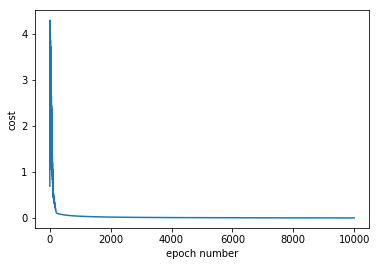

In [101]:
# 1000 = num_epochs
plt.plot(range(num_epochs), costs)
plt.xlabel('epoch number')
plt.ylabel('cost')
plt.show()data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXwAAAEKCAYAAAARnO4WAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAFWFJREFUeJzt3X2QXXV9x/HP597N5hmTmMUJJCGA1kody8MWeagdB1ERHbSKFSqIDx2m1s6g7YyV2hkrbWe0ox3L6AgMilhREUVLMyilIDioBDYIBAhP4UECwWyIkISQZHfvt3+c39292ezDDbsn5+4579fMnT3nd37nnO+5J/ncs+eePccRIQBA+dWKLgAAcGAQ+ABQEQQ+AFQEgQ8AFUHgA0BFEPgAUBEEPgBUBIEPABVB4ANARXQVXUCrpUuXxqpVq4ouAwBmjLVr126JiJ52+nZU4K9atUp9fX1FlwEAM4btJ9vtyykdAKgIAh8AKoLAB4CKIPABoCIIfACoCAIfACqCwAeAiihF4K99cqvWb9pWdBkA0NE66g+vXq73ff3XkqQnvvDOgisBgM5ViiN8AMDkCHwAqAgCHwAqgsAHgIog8AGgIgh8AKgIAh8AKoLAB4CKIPABoCJyD3zbddu/sb0673UBAMZ3II7wL5C0/gCsBwAwgVwD3/ZySe+UdHme6wEATC7vI/yvSPq0pEbO6wEATCK3wLf9LkmbI2LtJP3Ot91nu6+/v39K69z64p4pzQ8AZZbnEf7Jks6w/YSk70s6xfZ3RneKiMsiojcient6eqa0wp17Bqc0PwCUWW6BHxEXRsTyiFgl6SxJN0fEOXmtDwAwMa7DB4CKOCBPvIqIWyTdciDWBQAYW6mO8IcaUXQJANCxShX41697tugSAKBjlSrwhxpc7g8A4ylV4AMAxkfgA0BFEPgAUBGlCvwhTuEDwLhKFfiX3Lqh6BIAoGOVKvBfGhgqugQA6FilCnwAwPgIfACoCAIfACqCwAeAiiDwAaAiCHwAqAgCHwAqgsAHgIog8AGgIgh8AKgIAh8AKoLAB4CKIPABoCIIfACoCAIfACqCwAeAiiDwAaAiCHwAqAgCHwAqgsAHgIog8AGgIgh8AKgIAh8AKoLAB4CKIPABoCIIfACoCAIfACqCwAeAisgt8G3PsX2H7Xts32/783mtCwAwua4cl71b0ikRscP2LEm32f5pRNye4zoBAOPILfAjIiTtSKOz0ivyWh8AYGK5nsO3Xbd9t6TNkm6MiDV5rg8AML5cAz8ihiLiaEnLJR1v+/Wj+9g+33af7b7+/v48ywGASjsgV+lExPOSbpF02hjTLouI3ojo7enpORDlAEAl5XmVTo/tRWl4rqRTJT2Y1/oAABPL8yqdZZKutF1X9sHyg4hYneP6AAATyPMqnXslHZPX8gEA+4e/tAWAiiDwAaAiCHwAqAgCHwAqgsAHgIog8AGgIgh8AKgIAh8AKoLAB4CKIPABoCJKF/gv7h4sugQA6EilC/zH+l8sugQA6EilC/w9Q42iSwCAjlS6wB8g8AFgTKULfADA2Ah8AKgIAh8AKoLAB4CKIPABoCIIfACoiNIF/vpN24ouAQA6UukC/9q7ni66BADoSKULfADA2Ah8AKiI0gX+uqdfKLoEAOhIpQt8AMDY2gp82+9vpw0A0LnaPcK/sM02AECH6ppoou13SDpd0qG2L26ZdJAkHi0FADPIhIEv6RlJfZLOkLS2pX27pE/lVRQAYPpNGPgRcY+ke2x/NyIGJMn2YkkrIuL3B6JAAMD0aPcc/o22D7K9RNI9kq6w/R851gUAmGbtBv4rImKbpPdKuiIijpN0an5lAQCmW7uB32V7maS/kLQ6x3oAADlpN/AvknSDpA0RcaftIyQ9kl9ZAIDpNtlVOpKkiLhG0jUt449Jel9eRQEApl+7f2m73PaPbW+2/TvbP7K9PO/iAADTp91TOldIuk7SIZIOlfQ/qW1ctlfY/rnt9bbvt33B1EoFAExFu4HfExFXRMRgen1LUs8k8wxK+vuIeJ2kEyR9wvZRU6gVADAF7Qb+Ftvn2K6n1zmSnptohojYFBF3peHtktYr++0AAFCAdgP/o8ouyXxW0iZJZ0r6SLsrsb1K0jGS1uxfeQCA6dLWVTqS/kXSec3bKaS/uP2Ssg+CCdleIOlHkj6Z/nhr9PTzJZ0vSStXrmyzHADA/mr3CP8NrffOiYityo7YJ2R7lrKwvyoirh2rT0RcFhG9EdHb0zPZ1wIAgJer3cCvpZumSRo+wp/s1sqW9A1J6yOC++4AQMHaPaXzZUm/sv1DSaHsfP6/TTLPyZLOlbTO9t2p7R8j4vqXVSkAYEra/Uvbb9vuk3SKJEt6b0Q8MMk8t6W+AIAO0O4RvlLATxjyAIDO1e45fADADEfgA0BFEPgAUBEEPgBUBIEPABVB4ANARRD4AFARBD4AVASBDwAVQeADQEUQ+ABQEQQ+AFQEgQ8AFUHgA0BFEPgAUBEEPgBUBIEPABVB4ANARZQy8COi6BIAoOOUMvAb5D0A7KOUgQ8A2BeBDwAVUcrA37lnsOgSAKDjlDLwN2/fXXQJANBxShn4XKQDAPsqZeBLJD4AjFbKwOcIHwD2Vc7AL7oAAOhA5Qx8Eh8A9lHOwOcYHwD2UcrAv+2RLUWXAAAdp5SB//TzLxVdAgB0nFIGfoO7pwHAPkoZ+MQ9AOyrlIHf4DIdANhHSQO/6AoAoPPkFvi2v2l7s+378lrHeIaGSHwAGC3PI/xvSTotx+WP6+q+p4pYLQB0tNwCPyJ+IWlrXstvtWR+t8494bADsSoAmLFKcQ6fh5YDwOQKD3zb59vus93X398/heVMY1EAUEKFB35EXBYRvRHR29PTU3Q5AFBahQc+AODAyPOyzO9J+rWk19reaPtjea0LADC5rrwWHBFn57Xs8Rz2ynl68rmdB3q1ADAjlOKUTvMancOXzi+0DgDoZKUIfEmypDqX6gDAuEoT+JJUrxH4ADCeUgX+2W9cWXQJANCxShX4i+bOKroEAOhYpQj85p0VOKUDAOMrReA3IlSrWYvndRddCgB0rFIEfoRUs7ViybyiSwGAjlWKwG9EiLM5ADCxUgT+/NldmjOrXnQZANDRcru1woF052dPLboEAOh4pTjCBwBMjsAHgIog8AGgIgh8AKiI0gY+DzYHgL2VNvDXPL616BIAoKOUNvBX3/tM0SUAQEcpbeDv2DVYdAkA0FFKG/g/uZsjfABoVbrAP/V1BxddAgB0pNIF/pnHLS+6BADoSKUL/NNev6zoEgCgI5Uu8AEAYyt14D/8u+1FlwAAHaPUgf/P191fdAkA0DFKGfjLF8+VJP1qw3MFVwIAnaOUgX/9BW8qugQA6DilDPyD5swqugQA6DilDHwAwL5KH/gb+ncUXQIAdITSBv7H33ykJOn+Z7YVXAkAdIbSBv67jz5EkvSLh/sLrgQAOkNpA/8PDl5YdAkA0FFKG/i1mnXiEa/klA4AJKUNfEk65Q8P1vpN2/Sd25/US3uGii4HAArlTnrYd29vb/T19U3b8nbsHtQ5l6/R3U89r+6umnoPW6w/WbVERx1ykI5adpCWL54r29O2PgA40GyvjYjedvp25VzIaZL+U1Jd0uUR8YU81zfagtlduvbjJ+n2x5/Tzes367ZHt+jimx9R8zNu7qy6Vi6ZpxVL5mrFknlavnieli7oVs+C2Vq6cLaWLpitRXNnqVbjQwHAzJdb4NuuS/qapLdK2ijpTtvXRcQDea1zLLWaddKRS3XSkUslSTv3DOqhZ7frgU3b9Fj/i/rt1p16autO/WrDc9o5xmmfrpq1aF63DprTpYVzurRwzqz0c2R4fneX5nTXNaerprnddc2dVdec4VdteHzurLq6u2qaVa9pVt38dgHggMrzCP94SY9GxGOSZPv7kt4t6YAG/mjzurt0zMrFOmbl4r3aI0LP7xzQlh271b9jt7bs2KMt23dry47d+v3OAW3fNaDtuwa1bdeAnt22a3h8rA+JdnXVPBz+2c+aZnWl4VrLcL2m7npNXXWrbqtWs7pq2c+6rXrNqtmq16R6rZb9dMv0+uh+La/hflK9ln0I1WzVLNmSbVnK2mqS5eH2mrPxWrOfs36Wsr4t87ZOG5531Hpqo/oPz7PXvJKUfVDazaGRdTU/Q5t1ani6hj9gx+vXXLTbXH5zYrPfZMsf6evJ5+NgADnIM/APlfRUy/hGSW/McX1TYluL53dr8fxuveZV7V/SOTjU0EsDQ3ppYEi7B9LwniHtSm27BhraNTAyPjDU0MBQaM9gQwNDDQ02RoYHhhoaHArtGWoM92u2vzQwpIFdDQ01QkONUCNCg41QoxEailCjIQ01UlukPmlac56hCHXQVzZoQ+uH0egPBmtkokf1z5pHRkZ/frSOjv5w8Tgjoz+CWudrd/n7LmPsuSZe3uhpY883Ub2jjf5QHmvZEy2/3fdwvPmWzOvWD/76xHHrmy55Bv5Y7+4+cWP7fEnnS9LKlStzLCcfXfWaFtZrWjhDbtgWMRL+jYY02GhkHxapPSLUCCmUfqYPiQipEdmHSWikvZHam9OlvccbIWl4WSPLUJp39Hpa522up3XeaNmOkW3KltNsSosf7pdKyMZb+6W+re3RstCRZbQsZ4zla4zltC6/OWfrh+3w+zpqG/ZafnPZE9TZOl/r/67W/2ijL8yIcfrtOy3GbB9tn+W3sbyJ6th3XePX0W69Ey0/xnnj9n1vYsxpE69r/PemdWThnFy/Th2W51o2SlrRMr5c0jOjO0XEZZIuk7KrdHKsB8qOKLrqbtnx9QKrAXAg5Xkd/p2SXmP7cNvdks6SdF2O6wMATCC3I/yIGLT9t5JuUHYY+c2I4JmDAFCQXE8cRcT1kq7Pcx0AgPaU+tYKAIARBD4AVASBDwAVQeADQEUQ+ABQER11e2Tb/ZKefJmzL5W0ZRrLmQnY5vKr2vZKbPP+Oiwietrp2FGBPxW2+9q9J3RZsM3lV7XtldjmPHFKBwAqgsAHgIooU+BfVnQBBWCby69q2yuxzbkpzTl8AMDEynSEDwCYwIwPfNun2X7I9qO2P1N0PVNhe4Xtn9teb/t+2xek9iW2b7T9SPq5OLXb9sVp2++1fWzLss5L/R+xfV5R29QO23Xbv7G9Oo0fbntNqv3qdHtt2Z6dxh9N01e1LOPC1P6Q7bcXsyXts73I9g9tP5j294ll3s+2P5X+Td9n+3u255RxP9v+pu3Ntu9raZu2/Wr7ONvr0jwXe6LHeI0le/LOzHwpu+3yBklHSOqWdI+ko4quawrbs0zSsWl4oaSHJR0l6d8lfSa1f0bSF9Pw6ZJ+quzpYidIWpPal0h6LP1cnIYXF719E2z330n6rqTVafwHks5Kw5dI+nga/htJl6ThsyRdnYaPSvt+tqTD07+JetHbNck2Xynpr9Jwt6RFZd3Pyh53+rikuS3798Nl3M+S/kzSsZLua2mbtv0q6Q5JJ6Z5firpHftVX9Fv0BTf3BMl3dAyfqGkC4uuaxq3778lvVXSQ5KWpbZlkh5Kw5dKOrul/0Np+tmSLm1p36tfJ72UPQntJkmnSFqd/iFvkdQ1eh8re7bCiWm4K/Xz6P3e2q8TX5IOSgHoUe2l3M8aeb71krTfVkt6e1n3s6RVowJ/WvZrmvZgS/te/dp5zfRTOmM9KP3QgmqZVunX2GMkrZH0qojYJEnp58Gp23jbP5Pel69I+rSkRhp/paTnI2IwjbfWPrxdafoLqf9M2l4p+420X9IV6VTW5bbnq6T7OSKelvQlSb+VtEnZflur8u/npunar4em4dHtbZvpgd/Wg9JnGtsLJP1I0icjYttEXcdoiwnaO4rtd0naHBFrW5vH6BqTTJsR29uiS9mv/V+PiGMkvajsV/3xzOjtTues363sNMwhkuZLescYXcu2nyezv9s55e2f6YHf1oPSZxLbs5SF/VURcW1q/p3tZWn6MkmbU/t42z9T3peTJZ1h+wlJ31d2WucrkhbZbj6NrbX24e1K018haatmzvY2bZS0MSLWpPEfKvsAKOt+PlXS4xHRHxEDkq6VdJLKv5+bpmu/bkzDo9vbNtMDv1QPSk/fuH9D0vqI+I+WSddJan5Tf56yc/vN9g+lb/tPkPRC+pXxBklvs704HV29LbV1lIi4MCKWR8QqZfvu5oj4oKSfSzozdRu9vc334czUP1L7WenqjsMlvUbZl1sdKSKelfSU7demprdIekAl3c/KTuWcYHte+jfe3N5S7+cW07Jf07Tttk9I7+OHWpbVnqK/4JiGL0hOV3Y1ywZJny26niluy58q+xXtXkl3p9fpys5f3iTpkfRzSepvSV9L275OUm/Lsj4q6dH0+kjR29bGtr9ZI1fpHKHsP/Kjkq6RNDu1z0njj6bpR7TM/9n0Pjyk/bxyoaDtPVpSX9rXP1F2NUZp97Okz0t6UNJ9kv5L2ZU2pdvPkr6n7HuKAWVH5B+bzv0qqTe9hxskfVWjvvif7MVf2gJARcz0UzoAgDYR+ABQEQQ+AFQEgQ8AFUHgA0BFEPioJNtvdro7Z0Hr/7Dtrxa1flQTgQ/MQLbrRdeAmYfAR8eyfY7tO2zfbfvSZsjZ3mH7y7bvsn2T7Z7UfrTt29O9xX/cct/xV9v+P9v3pHmOTKtY4JF70l811r3Fbd9i+4upjodtvym173WEbnu17Te31PdF22vTeo9Py3nM9hkti19h+2fO7u3+uTa3+yLba5TdXRLYLwQ+OpLt10n6gKSTI+JoSUOSPpgmz5d0V0QcK+lWSc2w/Lakf4iINyj7y8Vm+1WSvhYRf6zsHi6bUvsxkj6p7D7rRyi7t89YuiLi+NT3c+P0aTVf0i0RcZyk7ZL+Vdltrv9c0kUt/Y5P23S0pPfb7m1ju++LiDdGxG1t1AHspWvyLkAh3iLpOEl3pgPvuRq56VRD0tVp+DuSrrX9CkmLIuLW1H6lpGtsL5R0aET8WJIiYpckpWXeEREb0/jdyu5jPlaQNm9itzb1mcweST9Lw+sk7Y6IAdvrRs1/Y0Q8l9Z/rbJbawxOsN1Dym6sB7wsBD46lSVdGREXttF3ovuDTPQIuN0tw0Ma///D7jH6DGrv35DntAwPxMg9SxrN+SOi0XJ3yLHqbt4Cd7zt3hURQ+PUCEyKUzroVDdJOtP2wdLwc0EPS9NqGrnL4l9Kui0iXpD0++Y5dknnSro1sucJbLT9nrSc2bbnTUN9T0g62nbN9gplp2f211vTds2V9B5Jv9TE2w1MCUf46EgR8YDtf5L0v7Zryu4++AlJTyp7YMgf2V6r7GlIH0iznSfpkhToj0n6SGo/V9Klti9Ky3n/NJT4S2WPKVyn7O6Fd72MZdym7M6Rr5b03Yjok6QJthuYEu6WiRnH9o6IWFB0HcBMwykdAKgIjvABoCI4wgeAiiDwAaAiCHwAqAgCHwAqgsAHgIog8AGgIv4f2f6lZKnZE80AAAAASUVORK5CYII=

Let's see our final cost.

In [103]:
print(costs[num_epochs - 1])

0.004881834672657065


Let's write a function that predicts the y value to test our accuracy.

In [108]:
def predict(X, W, b):
    Z = np.dot(W.T, X) + b
    A = sigmoid(Z)
    Y_pred = np.where(A > 0.5, 1, 0)
    return Y_pred

Now let's write a function that will calculate the accuracy.

In [119]:
def accuracy(Y_pred, Y):
    return np.average(Y_pred == Y) * 100

In [125]:
Y_pred = predict(X, W, b)
print("accuracy: " + (str)(accuracy(Y_pred, Y)) + "%")

accuracy: 100.0%
